In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def knapsack(W,n,items):
    '''
    This is the unoptimized version of the knapsack
    dynamic programming algorithm. I've coded this similar 
    to the videos on Stanford's Algorithms course on Coursera
    
    W: Size of Knapsack
    n: Number of items
    items: basket of items
    '''
    A = np.zeros((W+1,n))
    for i in range(n):
        w = items[i][1]
        v = items[i][0]
        for x in range(W+1):
            # set lookup column
            prev = i-1
            # for first iteration, do something special
            if prev < 0 and x >= w:
                cases = [v]
            else:
                cases = [A[x, prev]]
                if x >= w: cases.append(A[x-w, prev] + v)
            A[x, i] = np.max(cases)
    return A

def knapsackSvSp(W,items):
    '''
    Knapsack algorithm with some optimizations.  The optimizations are 
    only storing the previous column of subproblems and only iterating 
    over points where the value could possibly change.
    
    W: weight of knapsack
    items: list of items in (value, weight) format
    '''
    # initialize variables
    n = len(items)
    A = np.zeros((W+1,2))
    B = []
    for i in range(n):
        # move results from previous subproblem to subproblem lookup column
        A[:,0] = A[:,1]
        A[:,1] = np.zeros(W+1)
        # set weight and value for convenience
        w = items[i][1]
        v = items[i][0]
        # adds the unique elements that need to be checked
        B = list(set(B + [w + z for z in B if w+z < W+1] + [w] + [W]))
        B.sort()
        # initialize some variables from the elements changed part of the program
        last = (W,None)
        G = []
        for x in B:
            # backfill results
            if x - last[0] > 1:
                A[last[0]+1:x, 1] = last[1]
            # add item from previous iteration
            cases = [A[x, 0]]
            # add current val + val of lookup x-w
            if x >= w: cases.append(A[x-w, 0] + v)
            case_max = np.argmax(cases) 
            A[x, 1] = cases[case_max]
            # if this item is the same as the last ignore this place
            if A[x, 1] != last[1]:
                G.append(x)
            last = (x,A[x, 1])
        B = G
    return A, B


In [7]:
# Test Case

W_test = 6
n_test = 4
items_test = np.random.permutation([(3, 4), (2, 3), (4, 2), (4, 3)])
items_test = [(3, 4), (2, 3), (4, 2), (4, 3)]
print(items_test)
print(knapsack(W_test,n_test,items_test))
print(knapsackSvSp(W_test,items_test)[0])
A_test, B_test = knapsackSvSp(W_test,items_test)
print(np.where(A_test[:,0] != A_test[:,1])[0], B_test)

[(3, 4), (2, 3), (4, 2), (4, 3)]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  4.  4.]
 [ 0.  2.  4.  4.]
 [ 3.  3.  4.  4.]
 [ 3.  3.  6.  8.]
 [ 3.  3.  7.  8.]]
[[ 0.  0.]
 [ 0.  0.]
 [ 4.  4.]
 [ 4.  4.]
 [ 4.  4.]
 [ 6.  8.]
 [ 7.  8.]]
[5 6] [2, 5]


10000 100


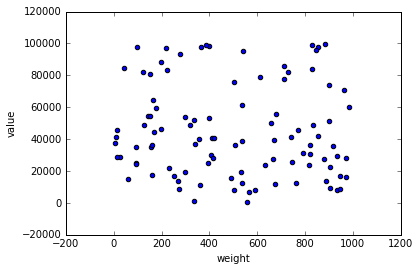

In [8]:
dat = pd.read_table("data/knapsack1.txt", delim_whitespace=True, header=None)

items_s = dat.ix[1:,:]
W_s = dat.ix[0,0]
n_s = dat.ix[0,1]
print W_s, n_s
items_s.columns = ['value', 'weight']
items_s.tail()
items_s.plot(kind='scatter', x='weight', y='value')

In [17]:
#A_small = knapsack(W_s,n_s,np.array(items_s))
#print A_small[W_s,n_s-1]
#A_sSvSp, B_sSvSp = knapsackSvSp(W_s,n_s,np.array(items_s))

#print A_sSvSp[W_s,1]
# 2493893.0

%timeit knapsack(W_s,n_s,np.array(items_s))
# 1 loop, best of 3: 6.86 s per loop
%timeit knapsackSvSp(W_s,np.array(items_s))
# 1 loop, best of 3: 466 ms per loop

1 loop, best of 3: 6.61 s per loop
1 loop, best of 3: 420 ms per loop


2000000 2000
      value  weight
1996  82788  711613
1997  20058  484073
1998  40941  895480
1999  76263  416912
2000  48122  661701


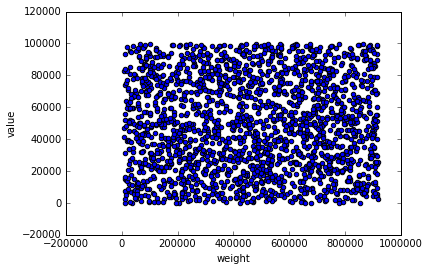

In [167]:
dat_b = pd.read_table("data/knapsack_big.txt", delim_whitespace=True, header=None)
items_b = dat_b.ix[1:,:]
W_b = dat_b.ix[0,0]
n_b = dat_b.ix[0,1]
print W_b, n_b
items_b.columns = ['value', 'weight']
print items_b.tail()
items_b.plot(kind='scatter', x='weight', y='value')


In [136]:
A_bSvSp, B_bSvSp = knapsackSvSp(W_b,np.array(items_b))
print A_bSvSp
# 4243395

[[       0.        0.]
 [       0.        0.]
 [       0.        0.]
 ..., 
 [ 4243395.  4243395.]
 [ 4243395.  4243395.]
 [ 4243395.  4243395.]]


In [137]:
%timeit knapsackSvSp(W_b,np.array(items_b))
# 1 loop, best of 3: 1min 6s per loop

1 loop, best of 3: 1min 6s per loop


In [216]:
s = B_bSvSp[0]
f = B_bSvSp[1]
#while len(B_bSvSp > 0)
print A_bSvSp[s,1]
print A_bSvSp[f,1]
print A_bSvSp[s,1] - A_bSvSp[f,1], s - f
items_b[items_b['value']==47161]
s = list()

for j in range(len(B_bSvSp)):
    wgt = B_bSvSp[j]
    val = A_bSvSp[B_bSvSp[j],1]
    entry = items_b[items_b['value']==np.int(A_bSvSp[B_bSvSp[j],1])].values.tolist()
    if len(entry) == 1:
        s.append([entry[0][0],entry[0][1]])
    else:
        for 
        print np.array(s)[:,0] - val
        print j, s, val, wgt
        break

41077.0
47161.0
-6084.0 -734
[-82858. -76774. -41077. -30702.]
4 [[41077, 8074], [47161, 8808], [82858, 9542], [93233, 12111]] 123935.0 17616
